<a href="https://colab.research.google.com/github/EySiba/Applied-datascience/blob/main/Music_Recommendation_System_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

## **Executive Summary**

Understanding users' preference is a key to any internet-based platform such as Spotify, which maximizes revenue based on the time spent by (current and prospective) consumers in the business platform. Key to achieving this business objective is optimizing users' experience in the platform, leveraging smart recommendation system that can recommend songs that users have not yet interacted with. Advancement in data science has made it possible to build a recommendation system that helps in recommending songs to Spotify's consumers, by extracting meaningful insights from rich dataset of users' preference history (i.e., their like/dislikes, or their interactions with the platform more broadly), and helpful additional information from their peers with similar preference.

The goal of this project is to build a recommendation system that can propose the top ten songs to a user, based on the one million song dataset, that the user has not interacted with yet. The task, for the data scientist, is to build the recommendation system to effectively recommend songs to customers based on the information on how users (and their peers with similar preferences) previously interacted with songs (as measured by play count) in the Million Song Dataset.

After considering several recommendations systems, the optimized matrix factorization model was found to do a good job of identifying key (latent) user and song-specific features in predicting likelihood of playing recommended songs, at the highest model accuracy scores among class of optimized recommendation models that are able to provide a personalized song recommendation. Furthermore, the matrix factorization model also provided song recommendations that are largely similar to the popularity-based and the user-user similarity-based recommendation models. Going forward, the model’s performance can further be strengthened by combining it with additional song and user-specific information and by additional hyperparameter tuning.


###**Problem and solution summary**
##**Summary of the problem**:

- Summary of the problem
•	The main goal of the capstone project was to build a song recommendation system that can help the internet-based business (Spotify) maximize its bottom line by increasing the time spent on the platform by its customers leveraging a smart and effective song recommendation system based on users’ song preference history, as captured by the million songs database.
•	Several recommendations systems were considered, including popularity-based ranking, collaborative filtering (user-user and item-item similarity-based), matrix factorization, Co-Clustering, and content-based recommendation systems.
•	Model performance, as measured by accuracy measures such as precision and recall rates, RMSE and F-1 score, was also optimized using various hyperparameter tuning.


### **- Explain the reason for the proposed solution design**

The optimized matrix factorization model provided the **highest accuracy measures of performance** among the class of optimized recommendation systems that can provide personalized song recommendations. The model also generated **similar song rankings** to that of the popularity-based ranking and the user-user similarity based collaborative filtering and Clustering technique to some extent. While the results were largely comparable to the results from the optimized user-user similarity-based filtering, **model performance was not directly comparable with the content-based ranking**, which tends to be less-personalized to users. Evaluation of model performance of the latter was also constrained by the **limited song-specific information** such as genres, tags and ratings which would have assisted in evaluating the performance of the content-based recommendation system. **In the absence of this additional information, the optimized matrix factorization model assisted well** in extracting latent (unobserved) feature extraction to build the recommendation system.

### **- How would it affect the problem/business?**

The model’s ability to achieve higher precision rate is good news for a digital business such as Spotify whose ability to **more accurately predict the likelihood of song being played largely defines business performance**. Ability to achieve higher recall rates, will also **improve operating costs** as more and more relevant songs are also recommended to users, bringing these songs to potential users’ attention.


### **The problem formulation**:

- What is it that we are trying to solve using data science?
The goal is to extract meaningful insights from the Million Songs data and build a recommendation system that helps in recommending songs to Spotify's consumers.The task, for the data scientist, is to build the recommendation system to effectively recommend songs to customers based on the information on how users (and their peers with similar preferences) previously interacted with songs(as measured by play count) in the Million Song Dataset.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# For implementing similarity-based recommendation system
!pip install surprise
from surprise.prediction_algorithms.knns import KNNBasic

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095463 sha256=07684589495fe2f40f109b6451b64163a3f3b89493eb94f1bfa3d032a937f0f2
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


### **Load the dataset**

In [ ]:
# Importing the datasets
song_df=pd.read_csv('/content/drive/MyDrive/ADSP/song_data.csv')
count_df=pd.read_csv('/content/drive/MyDrive/ADSP/count_data.csv')


### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
count_df.isna().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [ ]:
count_df.shape

(2000000, 4)

In [ ]:
count_df['user_id'].nunique()

76353

In [ ]:
count_df['song_id'].nunique()

10000

In [ ]:
count_df.describe()

,Unnamed: 0,play_count
count,2.000000e+06,2.000000e+06
mean,9.999995e+05,3.045485e+00
std,5.773504e+05,6.579720e+00
min,0.000000e+00,1.000000e+00
25%,4.999998e+05,1.000000e+00
50%,9.999995e+05,1.000000e+00
75%,1.499999e+06,3.000000e+00
max,1.999999e+06,2.213000e+03


In [ ]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
song_df.isna().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

In [ ]:
song_df.nunique()

song_id        999056
title          702428
release        149288
artist_name     72665
year               90
dtype: int64

In [ ]:
song_df.shape

(1000000, 5)

In [ ]:
# Checking how many duplicates there are in the song_df

song_df.duplicated().sum()

498

In [ ]:
# checking how many duplicates there are in the count_df

count_df.duplicated().sum()

0

#### **Observations and Insights:**
The count data has 2000000 observations containging, play counts of each songs with song_id for each user with user_id in the database. There are 76353 unique users and 10000 unique songs in the count_df database, with a potential of 76353 X 10000 interactions. The count_df data contains the variable "unnamed", which looks to me as an index used in the data, two string variables corresponding to user and song id, and a play count which is a numeric variable containing information on how many times a user listed to a song.There are no missing values and duplicates in the count_df data. The song_df data has 1000000 rows and 5 columns corresponding to song id and other additonal song-specific information such as the title, release, artist name and year of release. Except for the year of release variable, song_id, title, release and artist_name variables are all string variables. It is worth noting that there are 15 (5) missing values for the title (release) variable, respectively. Given that there are 498 duplicates in the song_df database, it may be possible to impute this missing values based on commonly shared song_id, where some rows (song ids) might have title information while other rows do not have the title information for the same song_id. Otherwise, we can drop missing values. The 498 duplicates in the song_df database can either safely be dropped here before merging the information in song_df with that of the count_df database. Alternatively, these duplicates can be dropped after the merge is completed below.


In [ ]:
# Dropping the missing value rows from the dataset

song_df = song_df.dropna()

In [ ]:
# Checking if all columns now have same number of observation after dropping the missing values
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999980 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   song_id      999980 non-null  object
 1   title        999980 non-null  object
 2   release      999980 non-null  object
 3   artist_name  999980 non-null  object
 4   year         999980 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 45.8+ MB


In [ ]:
# Checking if there no remaining missing values
song_df.isna().sum()

song_id        0
title          0
release        0
artist_name    0
year           0
dtype: int64

In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
song_with_count = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on = 'song_id', how = 'left')
song_with_count.describe()

,Unnamed: 0,play_count,year
count,2.000000e+06,2.000000e+06,2.000000e+06
mean,9.999995e+05,3.045485e+00,1.628645e+03
std,5.773504e+05,6.579720e+00,7.787283e+02
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.999998e+05,1.000000e+00,1.984000e+03
50%,9.999995e+05,1.000000e+00,2.002000e+03
75%,1.499999e+06,3.000000e+00,2.007000e+03
max,1.999999e+06,2.213000e+03,2.010000e+03


In [ ]:
#Checking the first few entries of the merged dataset song_with_count
song_with_count.head()

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
# Drop the column 'Unnamed: 0'
data = song_with_count.drop(columns=['Unnamed: 0'], axis = 1)
data.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
## Name the obtained dataframe as "df"
df = data.copy(deep=True)              #Deep copy: It creates a new DataFrame with a copy of the data and indices of the given DataFrame. Changes to the copy’s data or indices will not be reflected in the original DataFrame.https://stackoverflow.com/questions/27673231/why-should-i-make-a-copy-of-a-data-frame-in-pandas
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features? Yes, they can be encoded to numeric features, with one caveat: Some models might not take the ordering of the numeric values equally and hence may assign more importance to numeric codes (for song/user ids) assigned with larger numeric values, confusing the idea that larger numeric values imply higher importance. Other alternatives, for future exploration, to overcome this problem, suggested in the literature include to use **one-hot encoding** as explained  in this link:https://www.mygreatlearning.com/blog/label-encoding-in-python/

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'user_id'.
df['song_id']= label_encoder.fit_transform(song_with_count['song_id'])
df['user_id']= label_encoder.fit_transform(song_with_count['user_id'])

df['user_id'].unique()

array([54961, 39877, 56522, ..., 50599, 11660, 64590])

In [ ]:
#Checking first 5 entries of the df data
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
df.describe()

,user_id,song_id,play_count,year
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,3.813599e+04,4.978114e+03,3.045485e+00,1.628645e+03
std,2.204443e+04,2.890991e+03,6.579720e+00,7.787283e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.911200e+04,2.430000e+03,1.000000e+00,1.984000e+03
50%,3.794900e+04,5.038000e+03,1.000000e+00,2.002000e+03
75%,5.713500e+04,7.512000e+03,3.000000e+00,2.007000e+03
max,7.635200e+04,9.999000e+03,2.213000e+03,2.010000e+03


In [ ]:
#Checking the number of rows and columns
df.shape

(2000000, 7)

<Axes: xlabel='play_count', ylabel='count'>

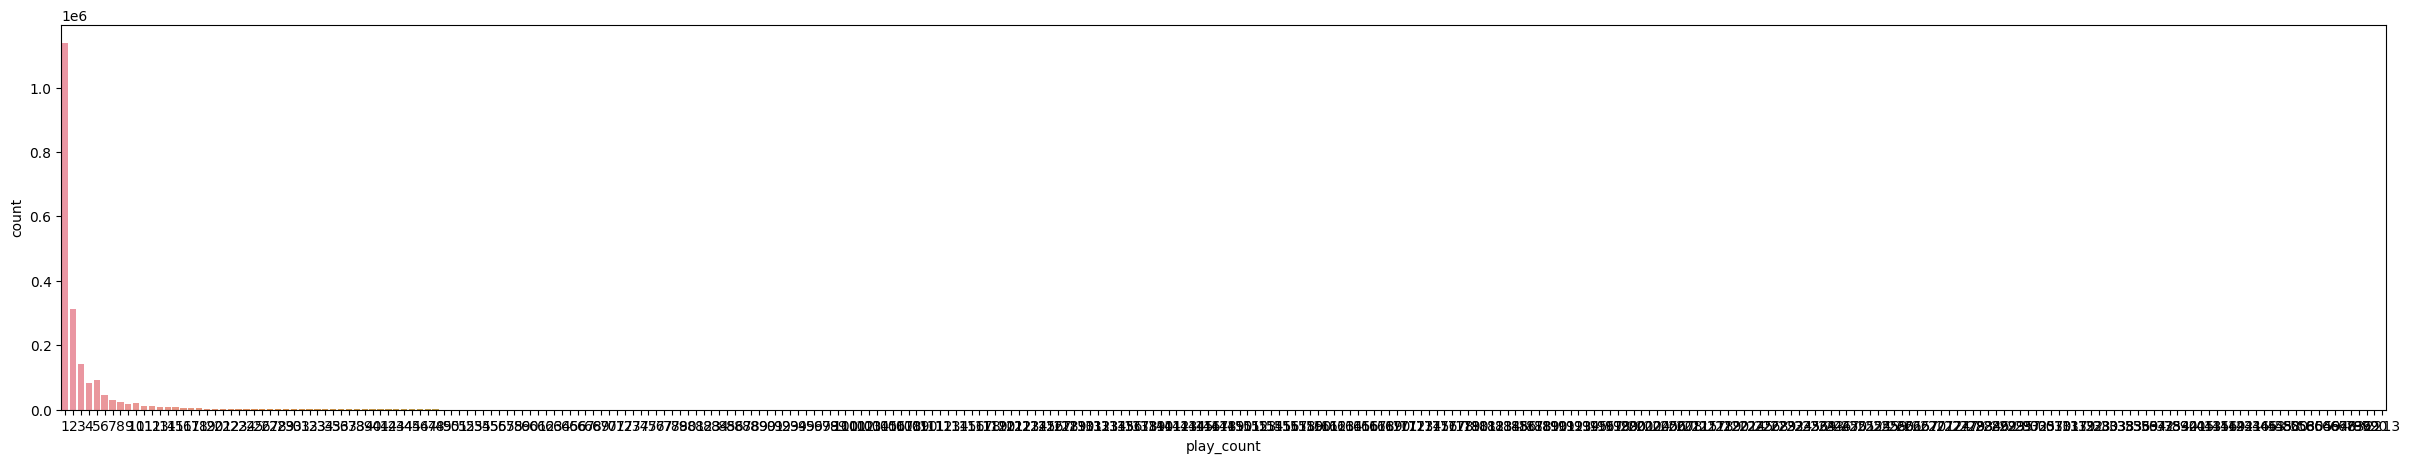

In [ ]:
plt.figure(figsize = (30, 5))
sns.countplot(x="play_count", data=df)

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?-The above count plot distributon of play counts, indicates that the majority of the play count data is concentrated between 1-5 play count per user and song combination.

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights:**
The database, in the df_final dataframe, is now reduced to 117876 observations, containing users that have listened to at least 90 songs, songs that have been listened to by at least 120 users. We have also dropped outlier songs (i.e. song that have been played by a user for more than 5 times). As a result, we have now 3155 unique users, 563 unique songs, and 232 unique artist names. It is worth noting that the number of songs to artist ratio is more than double, indicating that a given artist has more than one song registered in the database. This will ultimately reduce the sparcity of matrices to be built as part of the recommendation systems.

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# top 10 songs based on the number of listeners, not taking into account how many times each listener played the song
song_played = df_final.groupby(['song_id','title']).count()['play_count'].reset_index().sort_values('play_count' , ascending = False )
song_played.head(10)

,song_id,title,play_count
490,8582,Use Somebody,751
24,352,Dog Days Are Over (Radio Edit),748
136,2220,Sehr kosmisch,713
70,1118,Clocks,662
229,4152,The Scientist,652
309,5531,Secrets,618
248,4448,Fireflies,609
347,6189,Creep (Explicit),606
356,6293,Yellow,583
84,1334,Hey_ Soul Sister,570


In [ ]:
# top 10 songs when also considering the number of times the song was played
song_played_t = df_final.groupby(['song_id','title']).sum()['play_count'].reset_index().sort_values('play_count' , ascending = False )
song_played_t.head(10)

,song_id,title,play_count
24,352,Dog Days Are Over (Radio Edit),1634
136,2220,Sehr kosmisch,1583
490,8582,Use Somebody,1463
309,5531,Secrets,1427
248,4448,Fireflies,1291
229,4152,The Scientist,1259
84,1334,Hey_ Soul Sister,1208
70,1118,Clocks,1203
465,8092,OMG,1126
347,6189,Creep (Explicit),1067


Most interacted users

In [ ]:
# Top 10 users based on the number of play count
top_user = df_final.groupby('user_id').count()['play_count'].reset_index().sort_values('play_count' , ascending = False )
top_user.head(10)

,user_id,play_count
2547,61472,243
661,15733,227
1561,37049,202
398,9570,184
964,23337,177
440,10763,176
376,9097,175
1106,26616,175
1791,43041,174
2715,65994,171


#### **Observations and Insights:**
The **top 10 songs**, based on the play count regardless of how many times users interacted with the song, ranges from 751 play counts (1st most played song: "Use Somebody") to 570 play count (for the 10th most played song: Hey_ Soul Sister). This ranking (the list and order) changes when considering the number of times the song is played, as seen from the second table.

-The **top 10 users** result counts the number of songs these users have listened to, not considering how many times the songs were played. The first top user (user id 61472) has played 243 songs) while the 10th most user (user id 65994) has played 171 songs.


Songs played in a year

In [ ]:
# Find out the number of songs played in a year
  # Hint: # Hint: Use groupby function on the 'year' column
song_year = df_final.groupby('year').count()['title']
song_year.head(10)

year
0       20649
1969      238
1970      109
1971      133
1973      270
1974      583
1975      173
1976      478
1978      119
1979      220
Name: title, dtype: int64

In [ ]:
song_year2 = df_final.groupby('year').count()['song_id']
song_year2.head(10)

year
0       20649
1969      238
1970      109
1971      133
1973      270
1974      583
1975      173
1976      478
1978      119
1979      220
Name: song_id, dtype: int64

In [ ]:
df_final.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
206,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
209,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
213,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
216,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


In [ ]:
song_year.drop(song_year.index[0], inplace = True)
song_year.head()

year
1969    238
1970    109
1971    133
1973    270
1974    583
Name: title, dtype: int64

In [ ]:
# Find out the number of songs(or titles) played in a year
  # Hint: # Hint: Use groupby function on the 'year' column
titles_play = df_final.groupby(['year']).count()['title'].reset_index().sort_values('title' , ascending = False )
titles_play.head(10)

,year,title
0,0,20649
35,2009,16351
34,2008,14031
33,2007,13750
29,2003,7928
32,2006,7592
31,2005,5376
28,2002,5135
26,2000,4834
36,2010,4087


In [ ]:
titles_play.drop(titles_play.index[0], inplace = True)
titles_play.head(10)

,year,title
33,2007,13750
29,2003,7928
32,2006,7592
31,2005,5376
28,2002,5135
26,2000,4834
36,2010,4087
27,2001,2805
30,2004,2314
25,1999,1652


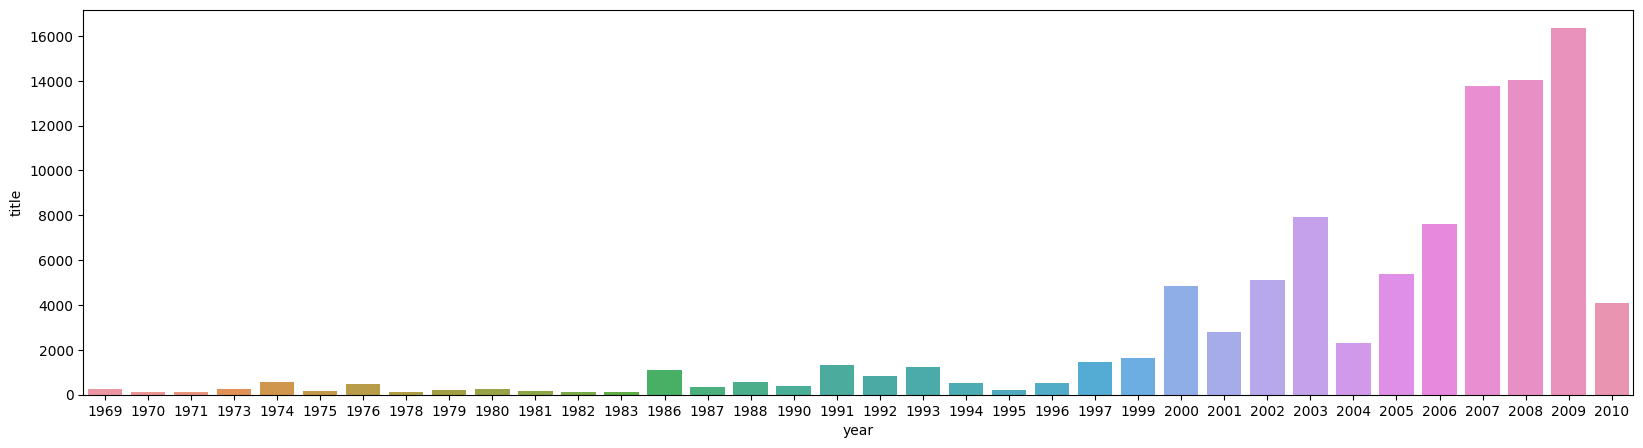

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
plt.figure(figsize = (20, 5))
sns.barplot(x = 'year', y = 'title',data = titles_play, estimator='mean')
plt.show()

#### **Observations and Insights:** #

The dataframe titles_play contains the "number of titles played" for years between 1969 and 2010. The highest number of titles/songs played was in 2009, with 16351 titles played, and the smallest number of songs were played in year 1970 (with just 109 titles played in that year). The average number of songs played in a year, depicted in the bar plot above, indicates a general upward trend in the number of titles played, despite a dip in 2010. This may be picking dying out of  popularity of older songs (or generational gap in music preferences), compared to those released near 2010. Songs released in the near past may still be in fashon whereas songs released in distant past may have had their hay days behind. Alternatively, the dip in 2010, may likely be due to a general drop in consumption/demand following the global financial crises in 2008/2009.

**Think About It:** What other insights can be drawn using exploratory data analysis? One can for instance check popularity of an artist, by the number of his/her songs played and by how many users, and investigate how his/her popularity evolved over time (i.e year of release)

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

# **Proposed approach**
**Potential techniques**: What different techniques should be explored?

Inorder to generate the list of top 10 recommended songs, the following factors could be exploreed:

*   user's preference history (likes and dislikes)
*   most popular songs that users might also like

*   Songs that might complement the songs that users have previously interacted with
*   Observed and latent user and item characteristics to identify the types of songs that users with similar taste listen to songs that the particular user of interest has not interacted with yet

**Overall solution design**: What is the potential solution design?

the potential solution design may include, but not limited to:
*   **Popularity based rankings**- to identify the most popular songs, based on play counts and number of users who have interacted with the songs,
*   **user-user similarity based collaborative filtering**- to identify users with similar (song) preferences, that have previously interacted with the songs that the particular user of interest has not seen/interacted with yet and might like when recommended
*   **item-item similarity based collabortive filtering**-identifying similar songs that might complement the songs that the user has previously interacted with (e.g songs from same/similar artist)
*   Identifying latent (**Matrix factorization System**) and observed user and item features/characteristics(**Content Based recommendation system**), to help identify similar users and items on which to base our song recommendation system.

**Measures of success**: What are the key measures of success to compare different potential technqiues?

Potential measures of success may include: Recall and precision rates, Root Mean Square Error (RMSE) and the F-score. Basically, we train the performace of our model on the training dataset and test its validity in the test dataset that has not been used in the training dataset. The model should ideally perform well in the out of sample estimation, to say something beyond the train dataset. The recall rate measures percentage of relevant songs that are recommended to the user and the precision rate measures percentage of recommended songs that the user end up listening to when recommended. the F-score capture the mean of these two measures. The higher the recall, prescion and F-score and the lower the RMSE, the better the model's performance in terms of model accuracy, which can further be improved by hyper-parameter tuning.



## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_play_s = df_final.groupby('song_id').mean()['play_count']

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
count_play_s = df_final.groupby('song_id').count()['play_count']

In [ ]:
# Making a dataframe with the average_count and play_freq
final_count_s = pd.DataFrame({'play_count_s': count_play_s, 'avg_play_s': average_play_s})
# Let us see the first five records of the final_play dataset
final_count_s.head()

,play_count_s,avg_play_s
song_id,,
21,265,1.622642
22,132,1.492424
52,421,1.729216
62,114,1.728070
93,115,1.452174


In [ ]:
# Sort the dataframe by average of play count in the descending order
final_count_s = final_count_s.sort_values(by = 'avg_play_s', ascending = False)

    # See the first five records of the "final_count_s" dataset
final_count_s.head()

,play_count_s,avg_play_s
song_id,,
7224,107,3.373832
8324,96,2.625000
6450,102,2.578431
9942,150,2.486667
5531,618,2.309061


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_song(data, n, min_interaction = 100):

# Finding products with minimum number of interactions
    recommendations_s = data[final_count_s['play_count_s'] > min_interaction]

# Sorting values with respect to average rating
    recommendations_s = recommendations_s.sort_values(by = 'avg_play_s', ascending = False)

    return recommendations_s.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_song(final_count_s, 10,50))

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_song(final_count_s, 10,100))

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

In [ ]:
df_final.describe()

,user_id,song_id,play_count,year
count,117876.000000,117876.000000,117876.000000,117876.000000
mean,37986.496954,4896.602608,1.700058,1652.819683
std,22041.887894,2916.276544,1.089517,761.726035
min,11.000000,21.000000,1.000000,0.000000
25%,19275.000000,2220.000000,1.000000,1994.000000
50%,37049.000000,5023.000000,1.000000,2005.000000
75%,57152.000000,7522.000000,2.000000,2008.000000
max,76347.000000,9989.000000,5.000000,2010.000000


**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?
The most common play count are 1 and 2 times, looking at the "titles played in a year" barplot above. The average play_count in the df_final data is 1.7, so the 1.5 treshold is not far off from these numbers. The higher we set the treshold, the fewer will be the number of relevant songs in our database, as we set the bar higher for the songs to be considered relevant for recommendation. This will inturn affect the recall and precision rates, as fewer number of songs will be found relevant and fewer songs, out of the finite sample of songs in the df_fianl data, will be considered for the recommendation list.

In [ ]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)


**Think About It:** How changing the test size would change the results and outputs? the bigger the test size, the smaller will be the remaining dataset to be set aside for the validation/test set. This may affect the ability of the model to predict out-of-sample estimations/inferences, as estimation over-fits the training dataset.

In [ ]:
# Build the default user-user-similarity model
## Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
## Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
## Fit the model on the training data
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**

The baseline user-user similarity based model has a much higher recall rate(0.692) than precision rate (0.396). Only 40% of the (30) recommended songs were listend to by the users when recommended. And 70% of the (30) relvant songs were recommended to users. These performances, notably the precision rate, should be improved inorder to accurately make an out-of-sample inference on the validation/test set and to effectively recommend songs with higher likelihood of being listened to by the user. There is also a room to improve the recall rate as not all relevant songs are being recommended.

In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(6958, 447, r_ui = 1, verbose = True)

user: 6958       item: 447        r_ui = 1.00   est = 1.12   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=447, r_ui=1, est=1.1222839992769744, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
 ## Find unique user_id where song_id is not equal to 447
df_final[df_final.song_id != 447].user_id.unique()

array([ 6958, 27018, 55837, ..., 12960, 71830, 47786])

In [ ]:
sim_user_user.predict(27018, 447, verbose = True)

user: 27018      item: 447        r_ui = None   est = 1.33   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=27018, iid=447, r_ui=None, est=1.3251578586477182, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
The baseline model predicted play count of 1.12 for song 447 which user 6958 has previously interacted with and listend to once. The estimate is not very far off from the acutal play count. Whereas, the model predicted a play count of 1.33 for user (27018) that has not previously interacted with the song 447.

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40, 50], 'min_k': [3, 6, 9],     #Question: How to pick numbers for k?
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0568231582489838
{'k': 50, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


In [ ]:
# Train the best model found in above gridsearch


## Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 50, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0596
Precision:  0.414
Recall:  0.623
F_1 score:  0.497


In [ ]:
df_final.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
206,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
209,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
213,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
216,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


**Observations and Insights:**

The RMSE has slightly declined and the precision rate improved a bit in the optimized user-user similarity based model, compared to the baseline model. These are improvements in model accuracy. However the recall rate and the overall F-1 score declined. It seems to me the accuracy of the model has not improved significantly after the hyperparameter tunning. But for an online business whose bottomline is dependent on recommended songs being listened to, an improvment in the precision rate might me more important.

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.53   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5325739475720954, details={'actual_k': 50, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
#sim_user_user_optimized.predict(6958, 447, verbose = True)
#Finding song that are listened to by the user with user_id 6958
df_final[df_final.user_id == 6958].song_id.unique()

array([ 447,  512,  549,  703,  719,  892, 1050, 1480, 1671, 1752, 1756,
       1787, 1818, 2107, 2289, 2304, 2425, 2501, 2701, 2898, 2994, 3074,
       3491, 3551, 3718, 3801, 3907, 5193, 5340, 5441, 5566, 5894, 6305,
       7738, 8029, 8037, 8425, 9065, 9351])

In [ ]:
#Finding songs that are not listened to by the user with user_id 6958
df_final[df_final.user_id != 6958].song_id.unique()

array([  97,  122,  139,  693,  719,  765,  786,  861, 1118, 1406, 1461,
       1519, 1682, 1696, 1907, 1983, 2187, 2234, 2389, 2557, 3232, 3356,
       3518, 3548, 3655, 4152, 4298, 4377, 4510, 4522, 4545, 4653, 4724,
       4954, 5023, 5158, 5223, 5248, 5305, 5345, 5417, 5457, 5877, 6079,
       6121, 6148, 6191, 6232, 6293, 6350, 6500, 6572, 6618, 6636, 6709,
       6770, 6959, 6964, 7210, 7331, 7399, 7402, 7469, 7721, 7878, 7977,
       8019, 8086, 8247, 8265, 8299, 8434, 8612, 8973, 9055, 9099, 9292,
       9436, 9447, 9476, 9702, 9771, 9989, 1084, 5367, 7030, 7780, 8190,
        208,  334,  352,  605,  674,  703,  952, 1217, 1286, 1348, 1767,
       1818, 2210, 2220, 2672, 2850, 2859, 3602, 3658, 3690, 3718, 3770,
       3870, 4273, 4448, 5115, 5398, 5570, 5757, 5901, 6189, 6726, 6798,
       7103, 7416, 7636, 7791, 7796, 7911, 7980, 8034, 8138, 8481, 8582,
       8599, 8762, 8772, 9095, 9162, 9186, 9487, 9676, 9847,   52,  310,
        396,  630,  733,  916, 1161, 1248, 1281, 13

In [ ]:
# Predict the play count for a song (with song_id 97, the first in the above list) that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 97, verbose = True)

user: 6958       item: 97         r_ui = None   est = 1.42   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=97, r_ui=None, est=1.42, details={'actual_k': 50, 'was_impossible': False})

In [ ]:
# Predict the play count for a song (with song_id 1188, the first in the above list) that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 1188, verbose = True)

user: 6958       item: 1188       r_ui = None   est = 1.55   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=1188, r_ui=None, est=1.552529182879378, details={'actual_k': 50, 'was_impossible': False})

**Observations and Insights:**
The optimized user-user similarity model has under-estimated the play count of song 1671 with which user 6958 has previously interacted with and actually listend to the song twice.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, k = 5)

[31, 82, 90, 116, 125]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not visited yet
    non_interacted_item = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_item:

        # Predicting the play count for those non listened song ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    #return # Returning top n highest predicted rating products for this user
    return recommendations[:top_n]

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958 , 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,2.935235
1,6450,2.668720
2,8324,2.467205
3,6448,2.386082
4,4831,2.348859


**Observations and Insights:**
Three of the 5 songs (songs 7224, 8324 and 6450) recommended  to user 6958 belong to the top 10 recommended songs (with 50 minimum interaction threshold), based on the popularity based ranking model above. all 5 songs have above average play count

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_count_s):

  # Sort the songs based on play counts
 ranked_songs = final_count_s.loc[[items[0] for items in recommendations]].sort_values('play_count_s', ascending = False)[['play_count_s']].reset_index()

  # Merge with the recommended songs to get predicted play_count
 ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
 ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_count_s'])

  # Sort the songs based on corrected play_counts
 ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

 return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting? "**In the above-corrected rating formula, we can add the quantity 1 / np.sqrt(n) instead of subtracting it to get more optimistic predictions. But here we are subtracting this quantity, as there are some movies with ratings of 5 and we can't have a rating more than 5 for a movie**."

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_count_s)

,song_id,play_count_s,predicted_ratings,corrected_ratings
1,7224,107,2.935235,2.838562
2,6450,102,2.668720,2.569705
4,8324,96,2.467205,2.365143
0,6448,109,2.386082,2.290300
3,4831,97,2.348859,2.247324


**Observations and Insights:**
The corrected play count predictions are now lower as we subtract the additonal term to adjust for total play counts of the songs, in that both how many times the song is played (predicted rating/play count) and the frequency of a song is played (capturing how many users have listened to it) matter for how good the song is rated.

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items. Use random_state=1
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)


RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**
The baseline item-item similarity-based collaborative filtering recommendation system registers a decine in model accuracy, as measued by the precision, recall and F_1 score, despite a reduction in the root mean squared error levels.

In [ ]:
df_final.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
206,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
209,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
213,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
216,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
#Finding user that has not listened to the song (with song_id 1671)
df_final[df_final.song_id != 1671].user_id.unique()

array([ 6958, 27018, 55837, ..., 12960, 71830, 47786])

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)

sim_item_item.predict(27018, 1671, verbose = True)

user: 27018      item: 1671       r_ui = None   est = 2.55   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=27018, iid=1671, r_ui=None, est=2.5507234733908, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
Compared to the user-user based optimized recommendation model (with predicted play count of 1.53), the baseline item-item similarity-based model (with predicted play count of 1.36) under- estimated the predicted play count of song 1671 that user 6958 has previously interacted with and played 2 times. Also reflecting the above assessment about model accurecy of the item-item similarity-based recommendation system.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0345675719652265
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best modle found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0398
Precision:  0.325
Recall:  0.587
F_1 score:  0.418


**Observations and Insights:**

The optimized item-item similarity-based model has enhanced model accuracy as the Precision rate, Recall rate and the F_1 score have improved, despite a margianl increase in the RMSE. Overall, even the optimized model does not reach to the level of model accuracy of the user-user similarity-based models of recommendation systems above.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**
The predicted play count for song 1671 by user 6958 is the same in both baseline and optimized item-item similarity-based models.

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[3, 10, 11, 24, 30]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ["song_id", "predicted_ratings"])

,song_id,predicted_ratings
0,2842,1.650010
1,7921,1.542349
2,1767,1.540675
3,4631,1.539257
4,5417,1.538866


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_count_s)

,song_id,play_count_s,predicted_ratings,corrected_ratings
0,2842,232,1.650010,1.584357
1,7921,220,1.542349,1.474929
2,5417,135,1.538866,1.452800
3,4631,120,1.539257,1.447970
4,1767,112,1.540675,1.446184


**Observations and Insights:**

As before, the corrected play count estimations, adjusting for the play frequency (also capturing number of users who listened to the song), is lower. It is worth noting that, the list of recommended songs for the same user (6958) is completely different from the one based on the optimized user-user similarity-based model

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
#Finding users who have not listend to song with son_id 3232
df_final[df_final.song_id != 3232].user_id.unique()

array([ 6958, 27018, 55837, ..., 12960, 71830, 47786])

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.01343470763758
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html). TO EXPLORE ADDITONAL HYPERPARAMETERS IN THE FINAL SUMBISSION,IN THE INTEREST OF TIME

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**
The optimized SVD model has achieved the highest F_1 score, compared to the optimized collaborative filtering models above. The precision is rate is higher than the item-item similarity-based models and at par with the optimized user-user similarity based model. The model also achieved the lowest RMSE value, all hinting towards improvments in model accuracy.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

**Observations and Insights:**
However, the predicted play count for song 1671 for user 6958 is further under-estimated in the baseline svd model (1.27), though this has recovered a bit in the optimized svd model (1.34). For son 3232, the optimized svd model predicted higher play count (1.444) than the optimized item-item similarity based model (1.38) for user 6958.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_count_s)

,song_id,play_count_s,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:**

It is interesting to note that 3 of the 5 recommended songs (songs: 7224, 8324 and 6450 in the optimized svd model were also recommended to user 6958 in the recommendation model based on the optimized user-user similarity-based model. Another interesting finding is that these three songs and song 9942 also belong to the top 5 songs recommended based on popularity-based song recommendation systems model developed first.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
## Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0472382334184296
{'n_cltr_u': 3, 'n_cltr_i': 4, 'n_epochs': 30}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).
TO EXPLORE ADDITONAL HYPERPARAMETERS IN THE FINAL SUMBISSION,IN THE INTEREST OF TIME

In [ ]:
# Train the tuned Coclustering algorithm
## Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 40, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:**

The hyperparameter tuning, has left the model accuracy measures intact, so no improvement is achieved for the co-clustering optimized model. Furthermore, all the model accuracy measurses are worse than the optimized svd model estimated above.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

**Observations and Insights:**

The predicted play counts here are exactly the same as the baseline co-clustering model, not surprising given no chance in the model accuracy noted above.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_count_s)


,song_id,play_count_s,predicted_ratings,corrected_ratings
2,7224,107,3.094797,2.998124
4,8324,96,2.311498,2.209436
1,9942,150,2.215039,2.133390
0,5531,618,2.124563,2.084337
3,4831,97,2.123783,2.022248


**Observations and Insights:**
This list of recommeded songs picked 4 of the 5 popular songs (7224, 8324, 9942, 5531) in the rank/popularity-rank based recommendation system and 1 song (4831) from the top 5 list from the optimized user-user similarity-based rec model. Overall, based on model accuracy measures, the Co-Clustering model does not excel the performance of the optimized svd model.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_final['text'] = df_final['title'] + df_final['release'] +df_final['artist_name']

In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_final [['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And PrudenceDistillationErin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael ValentineSawdustThe Killers
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album)Vampire WeekendVampir...
They Might Follow You,6958,703,1,They Might Follow YouTiny VipersTiny Vipers
Monkey Man,6958,719,1,Monkey ManYou Know I'm No GoodAmy Winehouse


In [ ]:
# Create the series of indices from the data
#df_final = df_final.set_index('title')
df_small.shape

(561, 4)

In [ ]:
df_small.describe()

,user_id,song_id,play_count
count,561.000000,561.000000,561.000000
mean,39663.513369,4927.458111,1.935829
std,18353.517190,2898.178481,1.247633
min,11.000000,21.000000,1.000000
25%,27018.000000,2304.000000,1.000000
50%,42302.000000,5101.000000,1.000000
75%,50537.000000,7470.000000,3.000000
max,75901.000000,9989.000000,5.000000


In [ ]:
# Importing necessary packages to work with text data
import nltk
nltk.download('omw-1.4')

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
## Creating the TF-IDF object
tfidf = TfidfVectorizer(tokenizer = tokenize)

song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
## Making the DataFrame of movie_tfidf data
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.452606,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
## Let us see the above array
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

     recommended_songs = []

     indices = pd.Series(df_small.index)

    # Getting the index of the song that matches the title
     idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
     score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
     top_10_indexes = list(score_series.iloc[1 : 11].index)
     print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
     for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

     return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[345, 423, 234, 509, 374, 370, 371, 372, 373, 376]


['From Left To Right',
 'Nothing Better (Album)',
 'The Pretender',
 'Everlong',
 'Who Let You Go?',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 "Sam's Town"]

In [ ]:
df_small.iloc[[345, 423, 234, 509, 374, 370, 371, 372, 373, 376]]

,user_id,song_id,play_count,text
title,,,,
From Left To Right,42302,4739,1,From Left To RightCorymbBoom Bip
Nothing Better (Album),45386,1994,5,Nothing Better (Album)Give UpPostal Service
The Pretender,49549,6525,2,The PretenderEchoes_ Silence_ Patience & Grace...
Everlong,9097,9249,1,EverlongThe Colour And The Shape (Special Edit...
Who Let You Go?,67308,3534,1,Who Let You Go?SawdustThe Killers
Under The Gun,67308,771,2,Under The GunSawdustThe Killers
I Need A Dollar,67308,1674,1,I Need A DollarI Need A DollarAloe Blacc
Feel The Love,67308,1936,2,Feel The LoveIn Ghost ColoursCut Copy
All The Pretty Faces,67308,2716,1,All The Pretty FacesWhen You Were YoungThe Ki...


**Observations and Insights:**

Note that 4 of the 10 recommended songs similar to the song "Learn To Fly" are from a single artist :"The Killers".* Not much can be said about how similar these recommended songs are to that of "Learn to fly", which is not from the same artist. Additonal information such as genre, tags and ratings would have been more helpful interms of evaluating the performance of the content-based recommendation system.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?


*   The optimized svd model achieved the highest F_1 score and the lowest RMSE and the higest precision and recall rates, among the class of optimized models of recommendation systems explored in this capstone project. Its top 5 recommended songs for user 6958 picked 4 (3) of the populartiy based-ranking  (optimized user-user similarity-based) model. In contrast, the item-item similarity-based model generated completely different list of recommended songs unlike any of the other models explored. The content-based rec model, while easily relatable, is limited by the lack of additonal information in the data at hand such as song genres to evaluate the performance of the recommendation system. The similar_song function also makes it hard to compare the other song recommendation models which personalized list to a specific user. The popularity-based ranking is also not personalized. The coClustering model hasn't improved much interms of model accuracy, even after hyperparameter tunig. Overall, the optimized svd model seems to be the best bet among the class of rec models that are able to provide a personlized list of recommended songs. Going forward, adding additional song information and running addional hyper parameter tuning may improve the model performances further.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

*   when operating with limited song-related observed features, the optimized svd model did a good job in identifying latent characteristics when building the recommendation list and provided song recommendations that are shared with user-user similairty based model and popularity-based ranking models. This kind of makes sense because for music, ultimately user's taste and personality than how similar/popular the songs are, will ultimately decide which songs get to be listened to.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

Overall, the optimized svd model seems to be the best bet among the class of recommendation models that are able to provide a personlized list of recommended songs. Going forward, adding additional song-specific and user-specific information (e.g. for the content-based rec model) and running addional hyper parameter tuning (e.g for the Co-Clustering and user-user rec models), or a combination of the different recommendation techniques (i.e user-user similarity based with matrix factorization models ) to build hybrid recommendation systemsmay may further improve the model performances.